In [1]:
import numpy as np

import sympy as sym

import itertools

In [2]:
from importlib.machinery import SourceFileLoader

main = SourceFileLoader(
    "main", "main.py"
).load_module()

from main import *

In [3]:
import matplotlib.pyplot as plt

import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
import matplotlib.colors as colors

In [5]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

**Payoffs Formulation Two bits**

In [6]:
c = np.random.randint(0, 1)
b = np.random.randint(1, 3)

for _ in range(1000):
    
    p1, p2, q1, q2 = np.random.random(4)
    
    one_bit_M = transition_matrix_one_bit(p=[p1, p2], q=[q1, q2])
    
    two_bit_M = transition_matrix_two_bit(p=[p1, p2, p1, p2], q=[q1, q2, q1, q2])
    
    ss_one_bit = invariant_distribution(one_bit_M)
    ss_two_bit = invariant_distribution(two_bit_M)    

    
    assert np.isclose(ss_one_bit @ np.array([b - c, -c, b, 0]),
                      ss_two_bit @ payoffs_vector(c, b))

**Cooperation**

In [7]:
c = np.random.randint(0, 1)
b = np.random.randint(1, 3)

for _ in range(1000):
    
    p1, p2, q1, q2 = np.random.random(4)
    
    one_bit_M = transition_matrix_one_bit(p=[p1, p2], q=[q1, q2])
    
    two_bit_M = transition_matrix_two_bit(p=[p1, p2, p1, p2], q=[q1, q2, q1, q2])
    
    ss_one_bit = invariant_distribution(one_bit_M)
    ss_two_bit = invariant_distribution(two_bit_M) 
    
    assert np.isclose(ss_one_bit[0] + ss_one_bit[1],
                     (ss_two_bit[0] + ss_two_bit[4] + ss_two_bit[8] + ss_two_bit[12] +
                      ss_two_bit[1] + ss_two_bit[5] + ss_two_bit[9] + ss_two_bit[13]))

In [35]:
def cooperation(ss):
    return (ss[0] + ss[4] + ss[8] + ss[12] +
            ss[1] + ss[5] + ss[9] + ss[13])

In [67]:
def cooperation_three_bits(ss):
    return sum([s for i, s in enumerate(ss) if i in np.arange(0, 64, 4)] +
               [s for i, s in enumerate(ss) if i in np.arange(1, 64, 4)])

**Payoffs Formulation Three bits**

In [68]:
c = np.random.randint(0, 2)
b = np.random.randint(1, 4)

In [69]:
c = np.random.randint(0, 1)
b = np.random.randint(1, 3)

for _ in range(1000):
    
    p1, p2, p3, p4, q1, q2, q3, q4 = np.random.random(8)
    
    two_bit_M = transition_matrix_two_bit(p=[p1, p2, p3, p4], q=[q1, q2, q3, q4])
    
    three_bit_M = transition_matrix_three_bits(p=[p1, p2, p3, p4, p1, p2, p3, p4], 
                                               q=[q1, q2, q3, q4, q1, q2, q3, q4])
    
    ss_two_bit = invariant_distribution(two_bit_M)
    ss_three_bit = invariant_distribution(three_bit_M)    

    
    assert np.isclose(ss_two_bit @ payoffs_vector(c, b),
                      ss_three_bit @ payoffs_vector(c, b, dim=16))

In [70]:
c = np.random.randint(0, 1)
b = np.random.randint(1, 3)

for _ in range(1000):
    
    p1, p2, q1, q2 = np.random.random(4)
    
    
    two_bit_M = transition_matrix_two_bit(p=[p1, p2, p3, p4], q=[q1, q2, q3, q4])
    
    three_bit_M = transition_matrix_three_bits(p=[p1, p2, p3, p4, p1, p2, p3, p4], 
                                               q=[q1, q2, q3, q4, q1, q2, q3, q4])
    
    ss_two_bit = invariant_distribution(two_bit_M)
    ss_three_bit = invariant_distribution(three_bit_M)
    
    assert np.isclose(cooperation(ss_two_bit),
                      cooperation_three_bits(ss_three_bit))

In [76]:
np.arange(1, 64, 4)

array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61])

In [55]:
cooperation_three_bits(ss_three_bit)

0.6730186866724541

**Checks for matlab code**

In [9]:
p1, p2 = np.random.random(4), np.random.random(4)

In [10]:
p1, p2

(array([0.9600206 , 0.04541331, 0.71056106, 0.98220487]),
 array([0.83668461, 0.03192174, 0.29567438, 0.87814695]))

In [11]:
M  = transition_matrix_two_bit(p1, p2)

ss = invariant_distribution(M) 

In [12]:
ss

array([0.29148134, 0.07839233, 0.0306605 , 0.00937928, 0.07993666,
       0.06574564, 0.09038078, 0.07623087, 0.02362041, 0.09352887,
       0.00709159, 0.02737405, 0.01487504, 0.0746271 , 0.02348205,
       0.0131935 ])

In [13]:
c = 0.1

In [14]:
ss @ payoffs_vector(c, b)

0.48930763094133084

In [15]:
cooperation(ss)

0.7222073834108085

In [16]:
(ss_two_bit[0] + ss_two_bit[4] + ss_two_bit[8] + ss_two_bit[12] +
            ss_two_bit[1] + ss_two_bit[5] + ss_two_bit[9] + ss_two_bit[13])

0.47860163919623266

**check the three bits case**

In [87]:
p = np.random.random((1, 8))
p

array([[0.38936966, 0.27967184, 0.71714219, 0.62848394, 0.64400978,
        0.55232672, 0.47255486, 0.93458296]])

In [88]:
M = transition_matrix_three_bits(p[0], p[0])

ss = invariant_distribution(M)

In [90]:
c, b = 1, 3

In [92]:
ss @ payoffs_vector(c, b, dim=16)

1.1106122151571145

In [93]:
p

array([[0.38936966, 0.27967184, 0.71714219, 0.62848394, 0.64400978,
        0.55232672, 0.47255486, 0.93458296]])

**Evolutionary "simulations"**

In [94]:
import pandas as pd

In [95]:
names = ["p_1", "p_2", "p_3", "p_4", "t", "cooperation"]
cs = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [96]:
df_beta_one = [[pd.read_csv(f"data/matlab_two_bits_c_{c}.csv", names=names) for c in cs],
               [pd.read_csv(f"data/matlab_one_bit_b_1_c_{c}.csv", names=names) for c in cs]]

df_beta_point_one = [[pd.read_csv(f"data/matlab_two_bits_beta_0.1_seed_1_c_{c}.csv", names=names) for c in cs],
                     [pd.read_csv(f"data/matlab_one_bit_beta_0.1_seed_1_c_{c}.csv", names=names) for c in cs]]

df_beta_ten = [[pd.read_csv(f"data/matlab_two_bits_beta_10_seed_1_c_{c}.csv", names=names) for c in cs],
                     [pd.read_csv(f"data/matlab_one_bit_beta_10_seed_1_c_{c}.csv", names=names) for c in cs]]

In [97]:
df_beta_one = [[df.drop_duplicates() for df in dfs] for dfs in df_beta_one]
df_beta_point_one = [[df.drop_duplicates() for df in dfs] for dfs in df_beta_point_one]
df_beta_ten = [[df.drop_duplicates() for df in dfs] for dfs in df_beta_ten]

In [98]:
def frequencies(dfs, max_steps=10 ** 7):
    
    for df in dfs:
        frequencies = []
        previous = 0
        for value in df["t"][1:]:
            frequencies.append(value - previous)
            previous = value
        frequencies.append(max_steps - previous)

        df['frequencies'] = np.array(frequencies)
        df['frequencies norm'] = np.array(frequencies) / max_steps
        
    return dfs

In [99]:
df_beta_one = [frequencies(dfs) for dfs in df_beta_one]
df_beta_point_one = [frequencies(dfs) for dfs in df_beta_point_one]
df_beta_ten = [frequencies(dfs, 10 ** 8) for dfs in df_beta_ten]

In [100]:
labels = [r"$\beta$=0.1", r"$\beta$=1", r"$\beta$=10"]

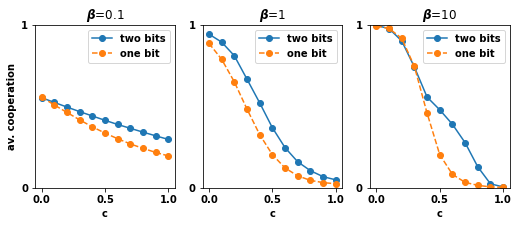

In [101]:
fig, axes = plt.subplots(ncols=3, figsize=(8.5, 3))

for i, gdfs in enumerate([df_beta_point_one, df_beta_one, df_beta_ten]):
    
    points = [[sum(df['frequencies norm'] * df['cooperation']) for df in dfs] for dfs in gdfs]

    axes[i].plot(np.linspace(0, 1, 11), points[0], '-o', label='two bits');
    axes[i].plot(np.linspace(0, 1, 11), points[1], '--o', label='one bit');

    axes[i].set_ylim(0, 1);

    axes[i].set_yticks(np.arange(0, 2))

    axes[i].set_xlabel("c")
    
    axes[i].legend();
    axes[i].set_title(labels[i])

axes[0].set_ylabel("av. cooperation");


In [107]:
dfs = [pd.read_csv(f"data/matlab_two_bits_beta_1_seed_{seed}_c_0.3.csv", names=names) for seed in range(1, 11)]

df2s = [pd.read_csv(f"data/matlab_one_bit_beta_1_seed_{seed}_c_0.3.csv", names=names) for seed in range(1, 11)]

In [108]:
dfs = [df.drop_duplicates() for df in dfs]

df2s = [df.drop_duplicates() for df in df2s]

In [109]:
dfs = frequencies(dfs)

df2s = frequencies(df2s)

In [110]:
abundance = [(df.iloc[df['frequencies'].idxmax()]['p_1'], 
              df.iloc[df['frequencies'].idxmax()]['p_2']) for df in df2s]

In [111]:
abundance2 = [(df.iloc[df['frequencies'].idxmax()]['p_1'], 
               df.iloc[df['frequencies'].idxmax()]['p_2'],
               df.iloc[df['frequencies'].idxmax()]['p_3'],
               df.iloc[df['frequencies'].idxmax()]['p_4'],) for df in dfs]

**Sanity check cooperations**

In [112]:
cooperation_rate = [sum(df['frequencies norm'] * df['cooperation']) for df in df2s]
cooperation_rate

[0.47908030917487,
 0.4888252362629993,
 0.48686901079070233,
 0.4751493507703379,
 0.4825297771617513,
 0.4836424239655296,
 0.48975617077648353,
 0.4851188392374209,
 0.4884323794816208,
 0.4844536763217556]

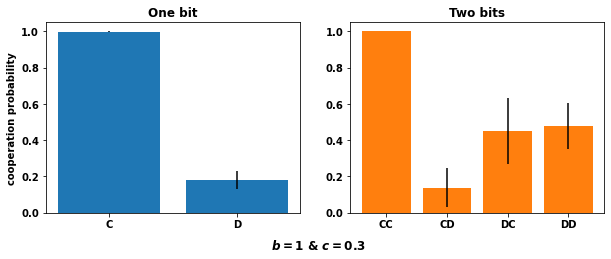

In [113]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 3.5))

heights = [[b[i] for b in abundance] for i in range(2)]

errors = [np.std(h) for h in heights]

for i in range(2):
    axes[0].bar(i + 1, np.mean(heights[i]), yerr=errors[i], color='C0')
    
axes[0].set_xticks([1, 2]);
axes[0].set_xticklabels(["C", "D"])
axes[0].set_title('One bit', fontweight='bold');

axes[0].set_ylabel("cooperation probability");

heights = [[b[i] for b in abundance2] for i in range(4)]
errors = [np.std(h) for h in heights]

for i in range(4):
    axes[1].bar(i + 1, np.mean(heights[i]), yerr=errors[i], color='C1')

axes[1].set_xticks([1, 2, 3, 4]);
axes[1].set_xticklabels(["CC", "CD", "DC", "DD"])
axes[1].set_title('Two bits', fontweight='bold');

axes[1].text(-.9, -.2, "$b=1$ & $c=0.3$", fontsize=12);

In [120]:
high_cs = [ 1 ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10 ] 

In [124]:
dfs = [pd.read_csv(f"data/matlab_three_bits_beta_1_seed_1_c_{c}.csv", names=names) for c in high_cs]

In [125]:
dfs = [df.drop_duplicates() for df in dfs]

In [126]:
dfs = frequencies(dfs)

In [127]:
points = [sum(df['frequencies norm'] * df['cooperation']) for df in dfs]

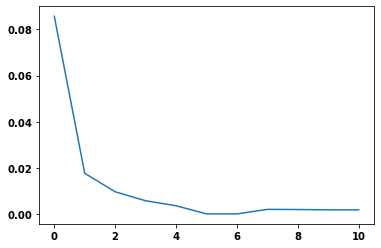

In [129]:
plt.plot(points);